<a href="https://www.kaggle.com/code/alexmariosimanjuntak/insect-classification?scriptVersionId=168097257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
import splitfolders

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os

train_Butterfly_dir = os.path.join('../input/insects-recognition/Butterfly')
train_Dragonfly_dir = os.path.join('../input/insects-recognition/Dragonfly')
train_Grasshopper_dir = os.path.join('../input/insects-recognition/Grasshopper')
train_Ladybird_dir = os.path.join('../input/insects-recognition/Ladybird')
train_Mosquito_dir = os.path.join('../input/insects-recognition/Mosquito')

In [4]:
# just checking the file name
train_Butterfly_names = os.listdir(train_Butterfly_dir)
train_Dragonfly_names = os.listdir(train_Butterfly_dir)
train_Grasshopper_names = os.listdir(train_Grasshopper_dir)
train_Ladybird_names = os.listdir(train_Ladybird_dir)
train_Mosquito_names = os.listdir(train_Mosquito_dir)
print(train_Butterfly_names[:10])

['istockphoto155.jpg', 'google423.jpg', 'google315.jpg', 'google104.jpg', 'istockphoto562.jpg', 'istockphoto421.jpg', 'istockphoto134.jpg', 'istockphoto343.jpg', 'istockphoto228.jpg', 'google150.jpg']


In [5]:
print('total training Butterfly images:', len(os.listdir(train_Butterfly_dir)))
print('total training Dragonfly images:', len(os.listdir(train_Dragonfly_dir)))
print('total training Grasshopper images:', len(os.listdir(train_Grasshopper_dir)))
print('total training Ladybird images:', len(os.listdir(train_Ladybird_dir)))
print('total training Mosquito images:', len(os.listdir(train_Mosquito_dir)))

total training Butterfly images: 899
total training Dragonfly images: 1036
total training Grasshopper images: 960
total training Ladybird images: 864
total training Mosquito images: 690


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

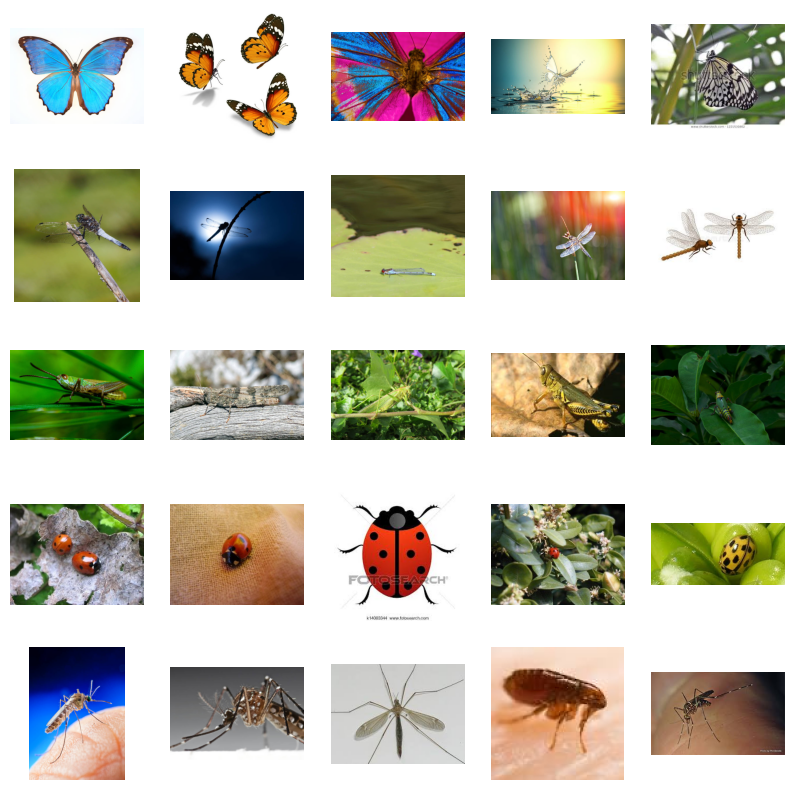

In [8]:
# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 5
next_Butterfly_pix = [os.path.join(train_Butterfly_dir, fname)
                for fname in train_Butterfly_names[pic_index-5:pic_index]]
next_Dragonfly_pix = [os.path.join(train_Dragonfly_dir, fname)
                for fname in train_Dragonfly_names[pic_index-5:pic_index]]
next_Grasshopper_pix = [os.path.join(train_Grasshopper_dir, fname)
                for fname in train_Grasshopper_names[pic_index-5:pic_index]]
next_Ladybird_pix = [os.path.join(train_Ladybird_dir, fname)
                for fname in train_Ladybird_names[pic_index-5:pic_index]]
next_Mosquito_pix = [os.path.join(train_Mosquito_dir, fname)
                for fname in train_Mosquito_names[pic_index-5:pic_index]]

for i, img_path in enumerate(next_Butterfly_pix+next_Dragonfly_pix+next_Grasshopper_pix+next_Ladybird_pix+next_Mosquito_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
base_dir = "/kaggle/input/insects-recognition"

In [10]:
splitfolders.ratio(base_dir,seed=0, output="insect-splitted", ratio=(0.8, 0.1, 0.1))

Copying files: 4449 files [00:27, 158.98 files/s]


# Building the Model

> Regularization: Add dropout layers to prevent overfitting. You can insert dropout layers after the dense layers in your model.

In [11]:
model = tf.keras.models.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # Adding dropout layer to reduce overfitting
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5), # Adding dropout layer to reduce overfitting
    
    tf.keras.layers.Dense(5, activation='softmax')
])

> - Batch normalization can help to improve the performance and stability of the model.
> - ReLU is a good activation function, but it is not the only option. You may want to try using LeakyReLU or ELU instead.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 298, 298, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 147, 147, 32)     128       
 hNormalization)                                                 
                                                        

In [14]:
# # using learning rate scheduler
# learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.001,
#     decay_steps=10000,
#     decay_rate=0.96,
#     staircase=True
# )

model.compile(loss = "categorical_crossentropy", 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ["accuracy"])

> This learning rate scheduler will gradually reduce the learning rate from 0.001 to 0.00001 over 10000 steps.

## Data Preprocessing

> Data Augmentation: Augment your training data by adding random transformations to your images. You can use the ImageDataGenerator to apply rotations, flips, zooms, and other transformations. This can help your model generalize better.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Flow training images in batches of 100 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/kaggle/working/insect-splitted/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        class_mode='categorical')

# All images will be rescaled by 1./255
valid_datagen = ImageDataGenerator(
    rescale=1/255,)

# Flow valid images in batches of 100 using valid_datagen generator
valid_generator = valid_datagen.flow_from_directory(
        '/kaggle/working/insect-splitted/val',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        class_mode='categorical')

test_datagen = ImageDataGenerator(
    rescale=1/255,)

test_generator = test_datagen.flow_from_directory(
        '/kaggle/working/insect-splitted/test',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        class_mode='categorical',
        shuffle=False
)

Found 3558 images belonging to 5 classes.
Found 443 images belonging to 5 classes.
Found 448 images belonging to 5 classes.


## Training

In [25]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get("val_accuracy") >= 0.85):
            self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [26]:
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    steps_per_epoch=111,
    epochs=100,
    callbacks = [callbacks]
    )

Epoch 1/10
111/111 [==============================] - 84s 754ms/step - loss: 0.5463 - accuracy: 0.8009 - val_loss: 0.6793 - val_accuracy: 0.7562
Epoch 2/10
111/111 [==============================] - 84s 754ms/step - loss: 0.5333 - accuracy: 0.8054 - val_loss: 0.5362 - val_accuracy: 0.8194
Epoch 3/10
111/111 [==============================] - 84s 752ms/step - loss: 0.5447 - accuracy: 0.7984 - val_loss: 0.5217 - val_accuracy: 0.8104
Epoch 4/10
111/111 [==============================] - 84s 752ms/step - loss: 0.5251 - accuracy: 0.8140 - val_loss: 0.5568 - val_accuracy: 0.8126
Epoch 5/10
111/111 [==============================] - 84s 760ms/step - loss: 0.5185 - accuracy: 0.8086 - val_loss: 1.2863 - val_accuracy: 0.6072
Epoch 6/10
111/111 [==============================] - 84s 756ms/step - loss: 0.6744 - accuracy: 0.7552 - val_loss: 0.5985 - val_accuracy: 0.7788
Epoch 7/10
111/111 [==============================] - 82s 740ms/step - loss: 0.5585 - accuracy: 0.7901 - val_loss: 0.5285 - val_ac

In [27]:
model.save('insect-classif.h5')

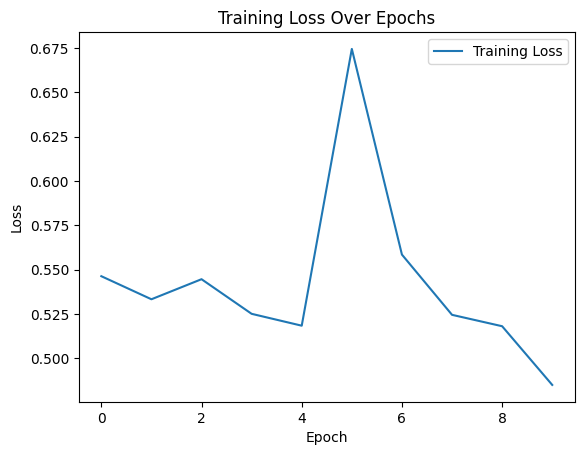

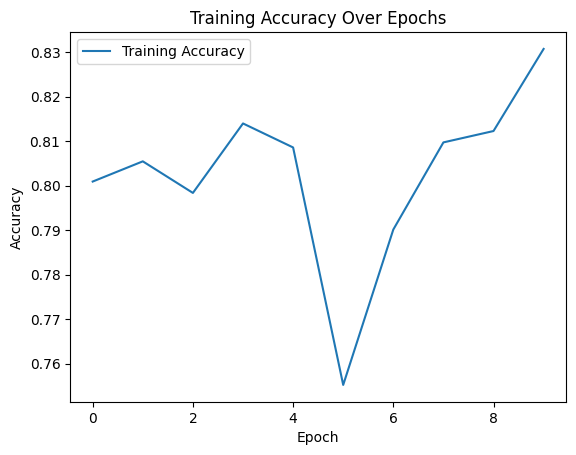

In [28]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [30]:
# Evaluate the model on your training data
train_loss, train_accuracy = model.evaluate(test_generator)

print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')

14/14 [==============================] - 2s 154ms/step - loss: 0.4749 - accuracy: 0.8393
Training Loss: 0.4749
Training Accuracy: 0.8393


## Model Prediction

In [32]:
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
import io

# Load the pre-trained model
# model = load_model('insect_model.h5')  # Replace 'insect_model.h5' with the path to your trained model

class_names = {
    0: "Butterfly",
    1: "Dragonfly",
    2: "Grasshopper",
    3: "Ladybird",
    4: "Mosquito"
}

# Download the image from the URL
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTt73gGL37FH6HKRfhLNB5AiQI4bJVcLR4_Bg&usqp=CAU"
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Open the image from the content as a binary stream and convert it to RGB
    image = Image.open(io.BytesIO(response.content)).convert("RGB")

    # Resize the image to the model's input size (300x300)
    image = image.resize((300, 300))

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Preprocess the image
    image_array = image_array / 255.0

    # Make a prediction
    prediction = model.predict(np.expand_dims(image_array, axis=0))  # Expand dimensions for a single image

    # Get the predicted insect class index
    predicted_class_index = np.argmax(prediction)

    # Get the corresponding insect name from the dictionary
    predicted_insect_name = class_names[predicted_class_index]

    # Print both the class index and the insect name
    print('Predicted insect class:', predicted_class_index)
    print('Predicted insect name:', predicted_insect_name)
else:
    print('Failed to download the image. Status code:', response.status_code)

1/1 [==============================] - 0s 21ms/step
Predicted insect class: 4
Predicted insect name: Mosquito
